In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import h5py
from matplotlib.animation import FuncAnimation, FFMpegWriter
import sleap_anipose as slap
import sleap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os
from tqdm import tqdm
import cv2


c:\Miniconda3\envs\sleap-anipose\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Miniconda3\envs\sleap-anipose\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Miniconda3\envs\sleap-anipose\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Path to your file
file_path = "points3d.h5"

# Open the HDF5 file
with h5py.File(file_path, 'r') as h5_file:
    # List all groups and datasets
    print("Keys in HDF5 file:", list(h5_file.keys()))
    
    # Access a specific dataset (replace 'dataset_name' with the actual key)
    points3d = h5_file['tracks'][:]  # Adjust key based on the printed keys
    
    # Check the data
    print("Shape of points3d:", points3d.shape)
    print("Data sample:", points3d[:5])

Keys in HDF5 file: ['tracks']
Shape of points3d: (123548, 1, 3, 3)
Data sample: [[[[-1.33218590e+01 -1.03040782e+01  1.06555837e+02]
   [-1.93556653e+01 -6.04628713e-03  1.04821670e+02]
   [-1.49595761e+01  6.72936767e-01  1.05645673e+02]]]


 [[[-1.33226072e+01 -1.03080562e+01  1.06555146e+02]
   [-1.93541289e+01 -1.16009519e-02  1.04825841e+02]
   [-1.49595761e+01  6.72936767e-01  1.05645673e+02]]]


 [[[-1.33236402e+01 -1.03103893e+01  1.06554471e+02]
   [-1.93509071e+01 -2.29680973e-02  1.04834289e+02]
   [-1.49595761e+01  6.72936767e-01  1.05645673e+02]]]


 [[[-1.33248466e+01 -1.03113104e+01  1.06553788e+02]
   [-1.93457584e+01 -4.05136329e-02  1.04847290e+02]
   [-1.49595761e+01  6.72936767e-01  1.05645673e+02]]]


 [[[-1.33261886e+01 -1.03107627e+01  1.06553053e+02]
   [-1.93383078e+01 -6.47896288e-02  1.04865235e+02]
   [-1.49595761e+01  6.72936767e-01  1.05645673e+02]]]]


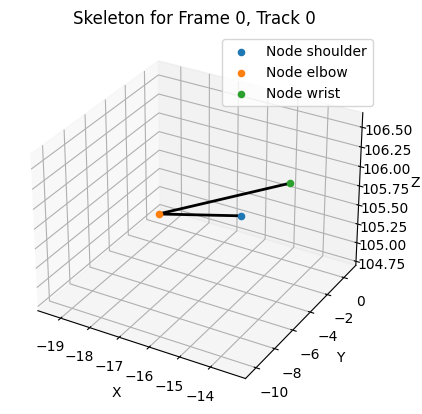

In [4]:
# Select a specific frame and track to visualize
frame_idx = 0  # Change this to visualize other frames
track_idx = 0  # Change this to visualize other tracks

# Get the coordinates for the selected frame and track
coords = points3d[frame_idx, track_idx]  # Shape: (3, 3)

# Define skeleton connections (edges)
connections = [(0, 1), (1, 2)]

# Plot the skeleton
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nodes = ["shoulder", "elbow", "wrist"]

# Plot each node
for i in range(3):
    ax.scatter(coords[i, 0], coords[i, 1], coords[i, 2], label=f'Node {nodes[i]}')

# Plot the skeleton connections
for start, end in connections:
    ax.plot(
        [coords[start, 0], coords[end, 0]],  # x-coordinates
        [coords[start, 1], coords[end, 1]],  # y-coordinates
        [coords[start, 2], coords[end, 2]],  # z-coordinates
        'k-', linewidth=2  # Black line for the skeleton
    )

# Add labels and a legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title(f"Skeleton for Frame {frame_idx}, Track {track_idx}")
plt.show()

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os
from tqdm import tqdm
import cv2

# Define skeleton connections (edges)
connections = [(0, 1), (1, 2)]
nodes = ["shoulder", "elbow", "wrist"]

# Create a directory to store frames
output_dir = "skeleton_frames"
os.makedirs(output_dir, exist_ok=True)

# Define start frame and number of frames to process
start_frame = 7368
num_frames = 2000
end_frame = start_frame + num_frames

# Compute global axis limits
x_min = points3d[:, :, :, 0].min()
x_max = points3d[:, :, :, 0].max()
y_min = points3d[:, :, :, 1].min()
y_max = points3d[:, :, :, 1].max()
z_min = points3d[:, :, :, 2].min()
z_max = points3d[:, :, :, 2].max()

# Iterate over selected frames and tracks
num_tracks = points3d.shape[1]  # Number of tracks
for frame_idx in tqdm(range(start_frame, end_frame), desc="Generating frames"):
    for track_idx in range(num_tracks):
        # Get the coordinates for the selected frame and track
        coords = points3d[frame_idx, track_idx]  # Shape: (3, 3)

        # Plot the skeleton
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Plot each node
        for i in range(3):
            ax.scatter(coords[i, 0], coords[i, 1], coords[i, 2], label=f'Node {nodes[i]}')

        # Plot the skeleton connections
        for start, end in connections:
            ax.plot(
                [coords[start, 0], coords[end, 0]],  # x-coordinates
                [coords[start, 1], coords[end, 1]],  # y-coordinates
                [coords[start, 2], coords[end, 2]],  # z-coordinates
                'k-', linewidth=2  # Black line for the skeleton
            )

        # Set consistent axis limits
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_zlim(z_min, z_max)

        # Add labels and a legend
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.legend()
        plt.title(f"Skeleton for Frame {frame_idx}, Track {track_idx}")

        # Save the frame
        frame_path = os.path.join(output_dir, f"frame_{frame_idx:04d}_track_{track_idx:02d}.png")
        plt.savefig(frame_path)
        plt.close(fig)

# Compile frames into a video using OpenCV
output_video = "skeleton_video.mp4"
frame_paths = sorted([os.path.join(output_dir, f) for f in os.listdir(output_dir) if f.endswith(".png")])

# Define video writer
frame = cv2.imread(frame_paths[0])
height, width, _ = frame.shape
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for mp4
video_writer = cv2.VideoWriter(output_video, fourcc, 30, (width, height))

# Write each frame to the video
for frame_path in tqdm(frame_paths, desc="Creating video"):
    frame = cv2.imread(frame_path)
    video_writer.write(frame)

# Release the video writer
video_writer.release()
print(f"Video saved to {output_video}")


Generating frames:   0%|          | 0/2000 [00:00<?, ?it/s]

Creating video: 100%|██████████| 3918/3918 [01:01<00:00, 63.65it/s]

Video saved to skeleton_video.mp4


In [6]:
# Umeyama Registration
def umeyama(P, Q):
    """
    Computes the optimal rotation, translation, and scaling factor to align
    two sets of points P and Q using the Umeyama algorithm.

    Args:
        P (numpy.ndarray): A numpy array of shape (n, dim) representing the source points.
        Q (numpy.ndarray): A numpy array of shape (n, dim) representing the target points.

    Returns:
        tuple: A tuple containing:
            - c (float): The optimal scaling factor.
            - R (numpy.ndarray): The optimal rotation matrix of shape (dim, dim).
            - t (numpy.ndarray): The optimal translation vector of shape (dim,).

    Raises:
        AssertionError: If P and Q do not have the same shape.

    Notes:
        - The Umeyama algorithm assumes that the input data is already centered around their means.
        - The method minimizes the mean squared error between the transformed source points
          and the target points.
    """
    assert P.shape == Q.shape
    n, dim = P.shape

    centeredP = P - P.mean(axis=0)
    centeredQ = Q - Q.mean(axis=0)

    C = np.dot(np.transpose(centeredP), centeredQ) / n

    V, S, W = np.linalg.svd(C)
    d = (np.linalg.det(V) * np.linalg.det(W)) < 0.0

    if d:
        S[-1] = -S[-1]
        V[:, -1] = -V[:, -1]

    R = np.dot(V, W)

    varP = np.var(P, axis=0).sum()
    c = 1/varP * np.sum(S) # scale factor

    t = Q.mean(axis=0) - P.mean(axis=0).dot(c*R)

    return c, R, t

In [7]:
# Path to your file
file_path = "umeyama_points3d.h5"

# Open the HDF5 file
with h5py.File(file_path, 'r') as h5_file:
    # List all groups and datasets
    print("Keys in HDF5 file:", list(h5_file.keys()))
    
    # Access a specific dataset (replace 'dataset_name' with the actual key)
    env_points3d = h5_file['tracks'][:]  # Adjust key based on the printed keys
    
    # Check the data
    print("Shape of points3d:", env_points3d.shape)
    print("Data sample:", env_points3d[:5])

Keys in HDF5 file: ['tracks']
Shape of points3d: (1, 1, 13, 3)
Data sample: [[[[-17.54155717   1.98618136  92.71502004]
   [ -8.99467377   3.18502363 114.66923114]
   [-17.6218672    4.2287493   92.83960361]
   [ -8.90764827   5.31959159 114.7062071 ]
   [ -8.7368111    2.66357684 119.33995823]
   [ -1.63237402   3.51567215 137.78568847]
   [ -8.71687775   4.53949881 119.31469767]
   [ -1.50454748   5.55400451 137.63926727]
   [-12.03497765   8.83494284 101.15178904]
   [ -8.68474759   9.75503281 129.94263319]
   [-11.93669196  12.2448744  101.18308352]
   [ -8.31825171  13.17805004 129.6006756 ]
   [  9.78382594 -12.59328444 109.54133501]]]]


In [8]:
from sleap.skeleton import Skeleton

def load_sleap_skeleton(json_file):
    """
    Load a SLEAP skeleton from a JSON file.

    Args:
        json_file (str): Path to the SLEAP skeleton JSON file.

    Returns:
        Skeleton: The deserialized SLEAP Skeleton object.
    """
    # Read the JSON file
    with open(json_file, 'r') as file:
        json_data = file.read()
    
    # Deserialize into a Skeleton object
    skeleton = Skeleton.from_json(json_data)
    return skeleton

# Path to your skeleton JSON file
skeleton_file = "env_skeleton.json"

# Load the skeleton
skeleton = load_sleap_skeleton(skeleton_file)

# Access nodes and edges
nodes = [node.name for node in skeleton.nodes]
edges = [(skeleton.nodes[src].name, skeleton.nodes[dst].name) for src, dst in skeleton.edge_inds]

# Display the skeleton structure
print("Nodes (Body Parts):", nodes)
print("Edges (Connections):", edges)

Nodes (Body Parts): ['barL_TR', 'barL_TL', 'barL_BR', 'barL_BL', 'barR_TR', 'barR_TL', 'barR_BR', 'barR_BL', 'base_TR', 'base_TL', 'base_BR', 'base_BL', 'water_spout']
Edges (Connections): [('barL_TR', 'barL_TL'), ('barL_TL', 'barL_BL'), ('barL_BL', 'barL_BR'), ('barR_TR', 'barR_TL'), ('barR_TR', 'barR_BR'), ('barR_BR', 'barR_BL'), ('base_TR', 'base_TL'), ('base_TL', 'base_BL'), ('base_BR', 'base_TR'), ('base_BR', 'base_BL')]


X-Axis: [ 0.95025125 -0.01808358 -0.31095906]
Y-Axis: [ 0.31092695 -0.00463254  0.95042252]
Z-Axis: [-0.01862757 -0.99982575  0.0012206 ]


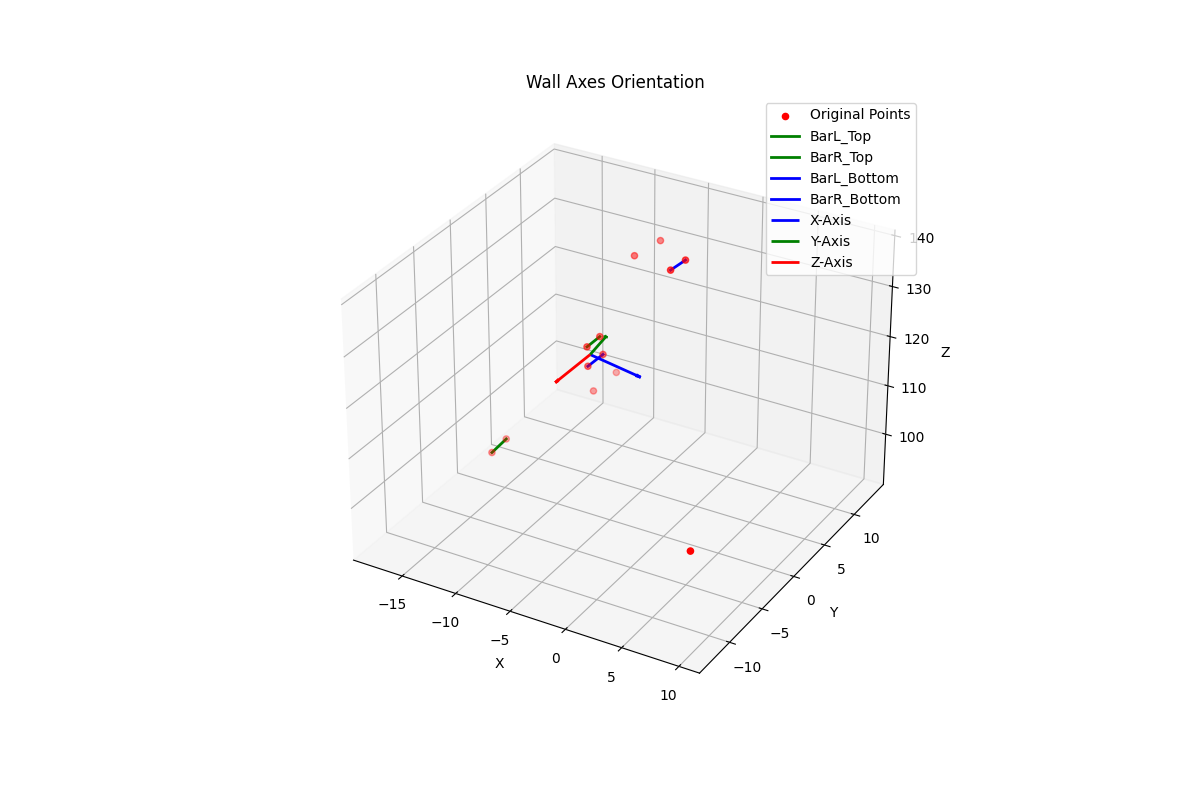

In [9]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Enable interactive mode
%matplotlib widget

def compute_axes(barL_points, barR_points):
    """
    Compute the coordinate axes for the wall:
    - Z-axis: Vertical direction (average of TL-BL and TR-BR differences).
    - Y-axis: Vector between the centers of barL and barR points.
    - X-axis: Normal to the plane (YZ).
    Returns normalized X, Y, Z axes.
    """
    # Compute Z-axis
    TL_BL_vector = (barL_points[0] - barL_points[2] + barR_points[0] - barR_points[2]) / 2
    TR_BR_vector = (barL_points[1] - barL_points[3] + barR_points[1] - barR_points[3]) / 2
    z_axis = (TL_BL_vector + TR_BR_vector) / 2
    z_axis /= np.linalg.norm(z_axis)

    # Compute Y-axis
    barL_center = barL_points.mean(axis=0)
    barR_center = barR_points.mean(axis=0)
    y_axis = barR_center - barL_center
    y_axis /= np.linalg.norm(y_axis)

    # Compute X-axis (normal to YZ plane)
    x_axis = np.cross(y_axis, z_axis)
    x_axis /= np.linalg.norm(x_axis)

    # Ensure orthogonality
    y_axis = np.cross(z_axis, x_axis)
    y_axis /= np.linalg.norm(y_axis)

    return x_axis, y_axis, z_axis

# Load environment points from HDF5 file
file_path = "umeyama_points3d.h5"
with h5py.File(file_path, 'r') as h5_file:
    env_points3d = h5_file['tracks'][:]

# Extract specific points for environment structure
barL_indices = [0, 1, 2, 3]  # TL, TR, BL, BR for barL
barR_indices = [4, 5, 6, 7]  # TL, TR, BL, BR for barR

barL_points = env_points3d[0, 0, barL_indices, :]
barR_points = env_points3d[0, 0, barR_indices, :]

# Compute axes
x_axis, y_axis, z_axis = compute_axes(barL_points, barR_points)
print("X-Axis:", x_axis)
print("Y-Axis:", y_axis)
print("Z-Axis:", z_axis)

# Plot for verification
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot original points
original_points = env_points3d[0, 0, :, :]
ax.scatter(
    original_points[:, 0],
    original_points[:, 1],
    original_points[:, 2],
    c='r',
    label='Original Points'
)

# Plot bars
for i, (start, end) in enumerate([(0, 2), (1, 3)]):  # Top to Bottom lines
    ax.plot(
        [barL_points[start, 0], barL_points[end, 0]],
        [barL_points[start, 1], barL_points[end, 1]],
        [barL_points[start, 2], barL_points[end, 2]],
        'g-' if i == 0 else 'b-', linewidth=2, label=f'BarL_{["Top", "Bottom"][i]}'
    )
    ax.plot(
        [barR_points[start, 0], barR_points[end, 0]],
        [barR_points[start, 1], barR_points[end, 1]],
        [barR_points[start, 2], barR_points[end, 2]],
        'g-' if i == 0 else 'b-', linewidth=2, label=f'BarR_{["Top", "Bottom"][i]}'
    )

# Plot axes
origin = (barL_points.mean(axis=0) + barR_points.mean(axis=0)) / 2
ax.quiver(
    origin[0], origin[1], origin[2],  # Origin
    x_axis[0], x_axis[1], x_axis[2],  # X-axis
    color='blue', length=5, linewidth=2, arrow_length_ratio=0.1, label='X-Axis'
)
ax.quiver(
    origin[0], origin[1], origin[2],  # Origin
    y_axis[0], y_axis[1], y_axis[2],  # Y-axis
    color='green', length=5, linewidth=2, arrow_length_ratio=0.1, label='Y-Axis'
)
ax.quiver(
    origin[0], origin[1], origin[2],  # Origin
    z_axis[0], z_axis[1], z_axis[2],  # Z-axis
    color='red', length=5, linewidth=2, arrow_length_ratio=0.1, label='Z-Axis'
)

# Set labels and title
ax.set_title("Wall Axes Orientation")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()

plt.show()


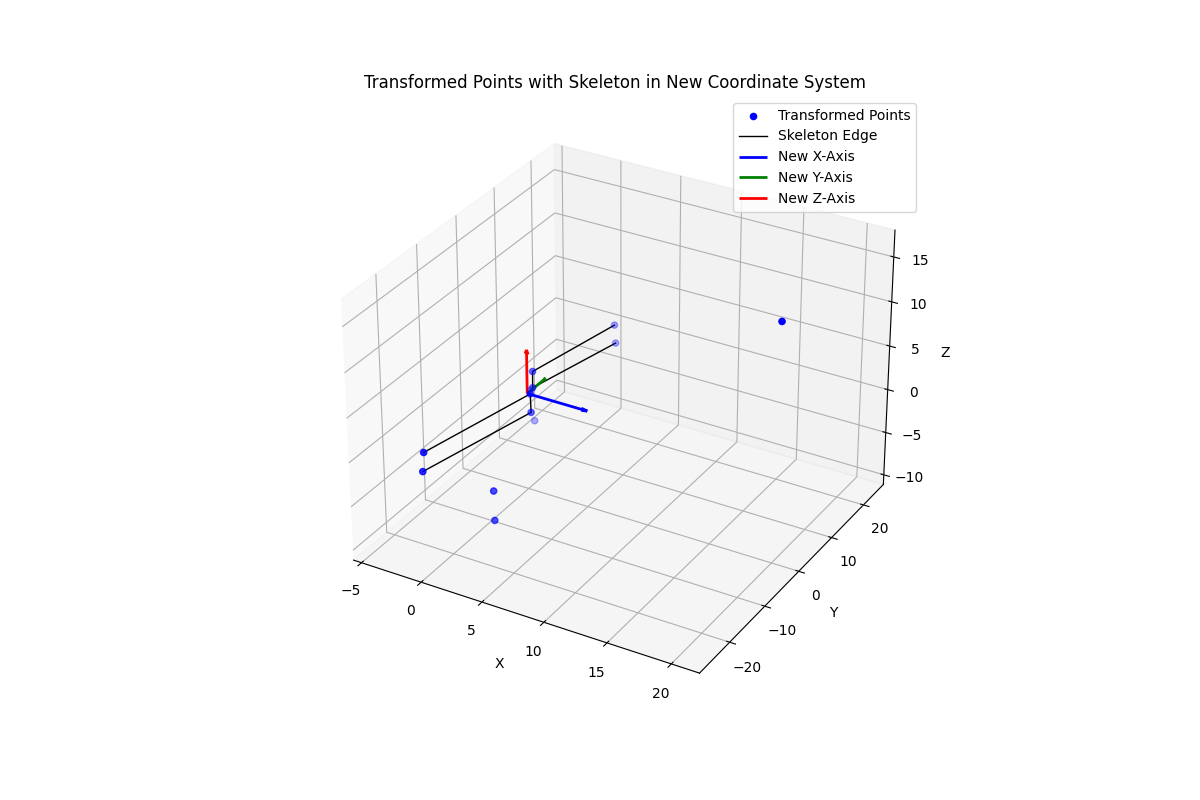

In [10]:
# Define the transformation matrix and origin
transformation_matrix = np.vstack([x_axis, y_axis, z_axis]).T  # Stack as columns for proper alignment
origin = (barL_points.mean(axis=0) + barR_points.mean(axis=0)) / 2  # Wall origin

# Transform the original points
original_points_centered = original_points - origin  # Center points at the new origin
transformed_points = original_points_centered @ transformation_matrix  # Apply the rotation

# Define skeleton edges for the environment
skeleton_edges = [
    (0, 1),  # barL_TR to barL_TL
    (1, 3),  # barL_TL to barL_BL
    (3, 2),  # barL_BL to barL_BR
    (4, 5),  # barR_TR to barR_TL
    (4, 6),  # barR_TR to barR_BR
    (6, 7),  # barR_BR to barR_BL
]

# Plot transformed points with skeleton
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot transformed points
ax.scatter(
    transformed_points[:, 0],
    transformed_points[:, 1],
    transformed_points[:, 2],
    c='b',
    label='Transformed Points'
)

# Plot skeleton edges
for start, end in skeleton_edges:
    ax.plot(
        [transformed_points[start, 0], transformed_points[end, 0]],
        [transformed_points[start, 1], transformed_points[end, 1]],
        [transformed_points[start, 2], transformed_points[end, 2]],
        'k-', linewidth=1, label='Skeleton Edge' if start == 0 else None
    )

# Plot the new coordinate axes
ax.quiver(
    0, 0, 0,  # Origin in new coordinate system
    1, 0, 0,  # X-axis
    color='blue', length=5, linewidth=2, arrow_length_ratio=0.1, label='New X-Axis'
)
ax.quiver(
    0, 0, 0,  # Origin in new coordinate system
    0, 1, 0,  # Y-axis
    color='green', length=5, linewidth=2, arrow_length_ratio=0.1, label='New Y-Axis'
)
ax.quiver(
    0, 0, 0,  # Origin in new coordinate system
    0, 0, 1,  # Z-axis
    color='red', length=5, linewidth=2, arrow_length_ratio=0.1, label='New Z-Axis'
)

# Set labels and title
ax.set_title("Transformed Points with Skeleton in New Coordinate System")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()

plt.show()


In [9]:
transformation_matrix

array([[ 0.95025125,  0.31092695, -0.01862757],
       [-0.01808358, -0.00463254, -0.99982575],
       [-0.31095906,  0.95042252,  0.0012206 ]])

In [24]:
points3d.shape

(123548, 1, 3, 3)

In [12]:
# Define skeleton connections (edges)
connections = [(0, 1), (1, 2)]  # Adjust based on data structure
nodes = ["shoulder", "elbow", "wrist"]  # Node names for visualization

# Transformation matrix and origin (computed earlier)
transformation_matrix = np.vstack([x_axis, y_axis, z_axis]).T  # Stack as columns for proper alignment
origin = [0, 0, 0]  # Adjust if you need a specific origin

# Create a directory to store frames
output_dir = "transformed_skeleton_frames"
os.makedirs(output_dir, exist_ok=True)

# Define start frame and number of frames to process
start_frame = 7368
num_frames = 2000
end_frame = start_frame + num_frames

# Transform all reaching points
points3d_centered = points3d - origin  # Center the points to the new origin
points3d_transformed = np.einsum('...j,kj->...k', points3d_centered, transformation_matrix)  # Apply transformation

# Compute global axis limits for transformed data
x_min = points3d_transformed[..., 0].min()
x_max = points3d_transformed[..., 0].max()
y_min = points3d_transformed[..., 1].min()
y_max = points3d_transformed[..., 1].max()
z_min = points3d_transformed[..., 2].min()
z_max = points3d_transformed[..., 2].max()

# Iterate over selected frames and tracks
num_tracks = points3d.shape[1]  # Number of tracks
for frame_idx in tqdm(range(start_frame, end_frame), desc="Generating transformed frames"):
    for track_idx in range(num_tracks):
        # Get the transformed coordinates for the selected frame and track
        coords = points3d_transformed[frame_idx, track_idx]  # Shape: (3, 3)

        # Plot the transformed skeleton
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Plot each node
        for i in range(3):
            ax.scatter(coords[i, 0], coords[i, 1], coords[i, 2], label=f'Node {nodes[i]}')

        # Plot the skeleton connections
        for start, end in connections:
            ax.plot(
                [coords[start, 0], coords[end, 0]],  # x-coordinates
                [coords[start, 1], coords[end, 1]],  # y-coordinates
                [coords[start, 2], coords[end, 2]],  # z-coordinates
                'k-', linewidth=2  # Black line for the skeleton
            )

        # Set consistent axis limits
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_zlim(z_min, z_max)

        # Add labels and a legend
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.legend()
        plt.title(f"Transformed Skeleton for Frame {frame_idx}, Track {track_idx}")

        # Save the frame
        frame_path = os.path.join(output_dir, f"frame_{frame_idx:04d}_track_{track_idx:02d}.png")
        plt.savefig(frame_path)
        plt.close(fig)

# Compile frames into a video using OpenCV
output_video = "transformed_skeleton_video.mp4"
frame_paths = sorted([os.path.join(output_dir, f) for f in os.listdir(output_dir) if f.endswith(".png")])

# Define video writer
frame = cv2.imread(frame_paths[0])
height, width, _ = frame.shape
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for mp4
video_writer = cv2.VideoWriter(output_video, fourcc, 30, (width, height))

# Write each frame to the video
for frame_path in tqdm(frame_paths, desc="Creating transformed video"):
    frame = cv2.imread(frame_path)
    video_writer.write(frame)

# Release the video writer
video_writer.release()
print(f"Video saved to {output_video}")

Generating transformed frames:   1%|▏         | 28/2000 [00:03<03:55,  8.37it/s]

: 